<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/generative_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

# Functional API :: freedom over design of deep network

from keras.layers import Input, Flatten, Dense
from keras.models import Model


input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

'''
Also possible:

x = Dense(units=200)(x)
x = Activation('relu')(x)
'''

model = Model(input_layer, output_layer)
model.summary()

In [ ]:
opt = tf.keras.optimizers.Adam(lr=.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=.4, wspace=.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(.5, -.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(.5, -.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

In [ ]:
input_layer = Input(shape=(64,64,1))

conv_layer_1 = Conv2D(
    filters = 2,
    kernel_size = (3,3),
    strides = 1,
    padding = 'same'
)(input_layer)

In [ ]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = tf.keras.layers.Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = tf.keras.layers.Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer =  tf.keras.layers.Flatten()(conv_layer_2)

output_layer =  tf.keras.layers.Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)
model.summary()

In [ ]:
# CNN on CIFAR-10

import tensorflow as tf

NUM_CLASSES = 10

# 32x32 images with R,G,B
input_layer = tf.keras.layers.Input((32,32,3))

# First convolution layer
# 32 3x3 kernels
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

# Second convolutional layer
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

# Third convolutional layer
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

# Fourth convolutional layer
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(rate=.5)(x)

x = tf.keras.layers.Dense(NUM_CLASSES)(x)
output_layer = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(input_layer, output_layer)


model.compile(tf.keras.optimizers.Adam(learning_rate=.01), tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test)
)


In [ ]:
model.evaluate(x_test, y_test, batch_size=1000)

In [ ]:
import matplotlib.pyplot as plt


indices = np.random.choice(range(len(x_test)), 10)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=.4, wspace=.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, 10, i+1)

  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)

  ax.imshow(img)

In [ ]:
from keras.callbacks import Callback, LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
import os

#### CALLBACKS
class CustomCallback(Callback):
    
    def __init__(self, run_folder, print_every_n_batches, initial_epoch, vae):
        self.epoch = initial_epoch
        self.run_folder = run_folder
        self.print_every_n_batches = print_every_n_batches
        self.vae = vae

    def on_batch_end(self, batch, logs={}):
        if batch % self.print_every_n_batches == 0:
            z_new = np.random.normal(size = (1,self.vae.z_dim))
            reconst = self.vae.decoder.predict(np.array(z_new))[0].squeeze()

            filepath = os.path.join(self.run_folder, 'images', 'img_' + str(self.epoch).zfill(3) + '_' + str(batch) + '.jpg')
            if len(reconst.shape) == 2:
                plt.imsave(filepath, reconst, cmap='gray_r')
            else:
                plt.imsave(filepath, reconst)

                
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch += 1



def step_decay_schedule(initial_lr, decay_factor=0.5, step_size=1):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        new_lr = initial_lr * (decay_factor ** np.floor(epoch/step_size))
        
        return new_lr

    return LearningRateScheduler(schedule)

In [ ]:
# Variational autoencoders

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

class Autoencoder():

  def __init__(self,
      input_dim,
      encoder_conv_filters,
      encoder_conv_kernel_size,
      encoder_conv_strides,
      decoder_conv_t_filters,
      decoder_conv_t_kernel_size,
      decoder_conv_t_strides,
      z_dim,
      use_batch_norm=False,
      use_dropout=False
  ):
    self.name = 'autoencoder'

    self.input_dim = input_dim
    self.encoder_conv_filters = encoder_conv_filters
    self.encoder_conv_kernel_size = encoder_conv_kernel_size
    self.encoder_conv_strides = encoder_conv_strides
    self.decoder_conv_t_filters = decoder_conv_t_filters
    self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
    self.decoder_conv_t_strides = decoder_conv_t_strides
    self.z_dim = z_dim

    self.use_batch_norm = use_batch_norm
    self.use_dropout = use_dropout

    self.n_layers_encoder = len(encoder_conv_filters)
    self.n_layers_decoder = len(decoder_conv_t_filters)

    self.build()
    self.model.summary()

  def build(self):

    ### THE ENCODER
    encoder_input = Input(shape=self.input_dim, name='encoder_input')

    x = encoder_input

    for i in range(self.n_layers_encoder):
        conv_layer = Conv2D(
            filters = self.encoder_conv_filters[i]
            , kernel_size = self.encoder_conv_kernel_size[i]
            , strides = self.encoder_conv_strides[i]
            , padding = 'same'
            , name = 'encoder_conv_' + str(i)
            )

        x = conv_layer(x)

        x = LeakyReLU()(x)

        if self.use_batch_norm:
            x = BatchNormalization()(x)

        if self.use_dropout:
            x = Dropout(rate = 0.25)(x)

    shape_before_flattening = K.int_shape(x)[1:]

    x = Flatten()(x)
    encoder_output= Dense(self.z_dim, name='encoder_output')(x)

    self.encoder = Model(encoder_input, encoder_output)


    ### THE DECODER
    decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

    x = Dense(np.prod(shape_before_flattening))(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    for i in range(self.n_layers_decoder):
        conv_t_layer = Conv2DTranspose(
            filters = self.decoder_conv_t_filters[i]
            , kernel_size = self.decoder_conv_t_kernel_size[i]
            , strides = self.decoder_conv_t_strides[i]
            , padding = 'same'
            , name = 'decoder_conv_t_' + str(i)
            )

        x = conv_t_layer(x)

        if i < self.n_layers_decoder - 1:
            x = LeakyReLU()(x)
            
            if self.use_batch_norm:
                x = BatchNormalization()(x)
            
            if self.use_dropout:
                x = Dropout(rate = 0.25)(x)
        else:
            x = Activation('sigmoid')(x)

    decoder_output = x

    self.decoder = Model(decoder_input, decoder_output)

    ### THE FULL AUTOENCODER
    model_input = encoder_input
    model_output = self.decoder(encoder_output)

    self.model = Model(model_input, model_output)

  def compile(self, learning_rate):
    self.learning_rate = learning_rate

    optimizer = Adam(lr=learning_rate)

    def r_loss(y_true, y_pred):
      return K.mean(K.square(y_true - y_pred), axis=[1,2,3])

    self.model.compile(optimizer=optimizer, loss=r_loss)


  def train(self, x_train, batch_size, epochs, run_folder, print_every_n_batches=100, initial_epoch = 0, lr_decay = 1):
    custom_callback = CustomCallback(run_folder, print_every_n_batches, initial_epoch, self)

    lr_sched = step_decay_schedule(initial_lr=self.learning_rate, decay_factor=lr_decay, step_size=1)

    checkpoint2 = ModelCheckpoint(os.path.join(run_folder, 'weights/weights.h5'), save_weights_only = True, verbose=1)

    callbacks_list = [checkpoint2, custom_callback, lr_sched]

    self.model.fit(
        x_train,
        x_train,
        batch_size=batch_size,
        shuffle=True,
        epochs=epochs,
        initial_epoch=initial_epoch,
        callbacks=callbacks_list
    )

In [ ]:
AE = Autoencoder(input_dim = (28,28,1)
, encoder_conv_filters = [32,64,64, 64]
, encoder_conv_kernel_size = [3,3,3,3]
, encoder_conv_strides = [1,2,2,1]
, decoder_conv_t_filters = [64,64,32,1]
, decoder_conv_t_kernel_size = [3,3,3,3]
, decoder_conv_t_strides = [1,2,2,1]
, z_dim = 2)

In [ ]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))


AE.compile(0.0005)


# Folder

# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #


AE.train(
    x_train,
    batch_size=32,
    epochs=1,
    run_folder=RUN_FOLDER,
    initial_epoch=0
)




In [ ]:
## VARIATIONAL AUTOENCODER

import numpy as np

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.utils import plot_model

class VariationalAutoencoder():
  '''
    Implements a variational autoencoder with a gaussian
    prior on latent factors.
  '''

  def __init__(
      self,
      input_dim,
      encoder_conv_filters,
      encoder_conv_kernel_size,
      encoder_conv_strides,
      decoder_conv_t_filters,
      decoder_conv_t_kernel_size,
      decoder_conv_t_strides,
      z_dim,
      use_batch_norm=False,
      use_dropout=False
  ):

    self.name = 'variational_autoencoder'
    self.input_dim = input_dim
    self.encoder_conv_filters = encoder_conv_filters
    self.encoder_conv_kernel_size = encoder_conv_kernel_size
    self.encoder_conv_strides = encoder_conv_strides
    
    self.decoder_conv_t_filters = decoder_conv_t_filters
    self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
    self.decoder_conv_t_strides = decoder_conv_t_strides

    self.z_dim = z_dim
    self.use_batch_norm = use_batch_norm
    self.use_dropout = use_dropout

    self.n_layers_encoder = len(encoder_conv_filters)
    self.n_layers_decoder = len(decoder_conv_t_filters)

    self._build()

  def train_with_generator(self, data_flow, epochs, lr_decay=1):
    self.model.fit_generator(
      data_flow,
      shuffle=True,
      epochs=epochs
    )


  def _build(self):
    
    ### THE ENCODER
    encoder_input = Input(shape=self.input_dim, name='encoder_input')

    x = encoder_input

    for i in range(self.n_layers_encoder):
        conv_layer = Conv2D(
            filters = self.encoder_conv_filters[i]
            , kernel_size = self.encoder_conv_kernel_size[i]
            , strides = self.encoder_conv_strides[i]
            , padding = 'same'
            , name = 'encoder_conv_' + str(i)
            )

        x = conv_layer(x)

        if self.use_batch_norm:
            x = BatchNormalization()(x)

        x = LeakyReLU()(x)

        if self.use_dropout:
            x = Dropout(rate = 0.25)(x)

    shape_before_flattening = K.int_shape(x)[1:]

    x = Flatten()(x)
    self.mu = Dense(self.z_dim, name='mu')(x)
    self.log_var = Dense(self.z_dim, name='log_var')(x)

    self.encoder_mu_log_var = Model(encoder_input, (self.mu, self.log_var))

    def sampling(args):
        mu, log_var = args
        epsilon = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
        return mu + K.exp(log_var / 2) * epsilon

    encoder_output = Lambda(sampling, name='encoder_output')([self.mu, self.log_var])

    self.encoder = Model(encoder_input, encoder_output)
    
    

    ### THE DECODER

    decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

    x = Dense(np.prod(shape_before_flattening))(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    for i in range(self.n_layers_decoder):
        conv_t_layer = Conv2DTranspose(
            filters = self.decoder_conv_t_filters[i]
            , kernel_size = self.decoder_conv_t_kernel_size[i]
            , strides = self.decoder_conv_t_strides[i]
            , padding = 'same'
            , name = 'decoder_conv_t_' + str(i)
            )

        x = conv_t_layer(x)

        if i < self.n_layers_decoder - 1:
            if self.use_batch_norm:
                x = BatchNormalization()(x)
            x = LeakyReLU()(x)
            if self.use_dropout:
                x = Dropout(rate = 0.25)(x)
        else:
            x = Activation('sigmoid')(x)

        

    decoder_output = x

    self.decoder = Model(decoder_input, decoder_output)

    ### THE FULL VAE
    model_input = encoder_input
    model_output = self.decoder(encoder_output)

    self.model = Model(model_input, model_output)


  def compile(self, learning_rate, r_loss_factor):
      def vae_r_loss(y_true, y_pred):
        r_loss = K.mean(K.square(y_true - y_pred), axis=[1,2,3])
        return r_loss_factor * r_loss

      def vae_kl_loss(y_true, y_pred):
        '''
          Berechnet die Kullback-Leibler Divergenz zwischen dem
          vorhergesagtem Wert und dem ursprünglichen Wert.

          Da es sich um Gauß-Verteilungen handelt, hat die KL-Divergenz die Form:

          DL(p,q) = 1/2 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        '''
        kl_loss = -.5 * K.sum(1 + self.log_var - K.square(self.mu) - K.exp(self.log_var), axis=1)
        return kl_loss

      def vae_loss(y_true, y_pred):
        r_loss = vae_r_loss(y_true, y_pred)
        kl_loss = vae_kl_loss(y_true, y_pred)
        return r_loss + kl_loss

      optimizer = Adam(learning_rate=learning_rate)
      self.model.compile(optimizer=optimizer, loss=vae_loss, metrics=[vae_r_loss, vae_kl_loss])

In [ ]:
from tensorflow.keras.datasets import mnist

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

def load_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = x_train.astype('float32') / 255.
  x_train = x_train.reshape(x_train.shape + (1,))
  x_test = x_test.astype('float32') / 255.
  x_test = x_test.reshape(x_test.shape + (1,))

  return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()


# Define model
vae = VariationalAutoencoder(
    input_dim=(28,28,1),
    encoder_conv_filters=[32,64,64,64],
    encoder_conv_kernel_size=[3,3,3,3],
    encoder_conv_strides=[1,2,2,1],
    decoder_conv_t_filters=[64,64,32,1],
    decoder_conv_t_kernel_size=[3,3,3,3],
    decoder_conv_t_strides=[1,2,2,1],
    z_dim=2,
    use_dropout=True,
    use_batch_norm=True
    )

# Compile
vae.compile(.01, 1)

vae.model.summary()

BATCH_SIZE = 32
EPOCHS = 2

# Train
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(x_test[0,:,:,0])

latent_vars_pred = vae.encoder.predict(x_test[:32], batch_size=32)

reconstructed_imgs = vae.decoder.predict(latent_vars_pred, batch_size=32)

plt.imshow(reconstructed_imgs[6,:,:,0])

In [ ]:
#################
# SAVING A MODEL
#################

import os

import tensorflow as tf

from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

# Define example model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()]
                )
  
  return model


model = create_model()
model.summary()


checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[cp_callback]
    )


model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('Untrained model accuracy: {:5.2f}'.format(100 * acc))

# Load weights
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('Untrained model accuracy: {:5.2f}'.format(100 * acc))

In [ ]:
## Checkpoint callback

checkpoint_path = 'training_2/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

### Save model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*batch_size
)

model = create_model()

model.save_weights(checkpoint_path.format(epoch=0))
model.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=batch_size,
    callbacks=[cp_callback],
    validation_data=(test_images, test_labels),
    verbose=0
)



In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

In [ ]:
## Save file in google drive
from google.colab import drive

DL_FOLDER_NAME = 'deep_learning'
MOD_FOLDER_NAME = 'models'
MOD_TYPE_FOLDER_NAME = 'vae'

MOD_NAME_TEMP = 'vae_{0}'

# drive.mount('/content/drive')


class DeepLearningUtil():
  '''
    Utility-Klasse die hauptsächlich Funktionen
    zum Laden/Speichern von DL-Modellen für Google
    Drive zur Verfügung stellt.

    Zu Beginn einer neuen Notebook-Sitzung muss
    der Drive-Datenspeicher gemountet werden, was eine manuelle
    Eingabe eines Tokens nötig macht.
  '''
  def __init__(self):
    self._DL_FOLDER_NAME = 'deep_learning'
    self._MOD_FOLDER_NAME = 'models'
    self._VAE_NAME_TEMPLATE = 'vae'
    self._EXP_FOLDER_NAME = 'experimental'

    self._EXP_MODEL_COUNT = 0

    drive.mount('/content/drive')

  def get_experimental_model_path(self):
    path = os.path.join(
        '/',
        'content',
        'drive',
        'My Drive',
        self._DL_FOLDER_NAME,
        self._MOD_FOLDER_NAME,
        self._EXP_FOLDER_NAME
        )

    ret_path = path + '/' + 'model_{0}'.format(self._EXP_MODEL_COUNT)
    self._EXP_MODEL_COUNT += 1

    return ret_path

In [ ]:
import os
import shutil
import zipfile

from google.colab import drive

drive.mount('/content/drive')

CELEB_A_PATH = os.path.join(
    '/',
    'content',
    'drive',
    'MyDrive',
    'img_align_celeba.zip'
    )

DATA_DIR = os.path.join('/', 'content', 'data', 'celeb')

zip_ref = zipfile.ZipFile(CELEB_A_PATH, 'r')
zip_ref.extractall(DATA_DIR)
zip_ref.close()

In [ ]:
## VARIATIONAL AUTOENCODER
##########################
##########################
##########################
##########################

import numpy as np
import os

from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = '/content/data/celeb'

INPUT_DIM = (128,128,3)
BATCH_SIZE = 32

filenames = np.array(os.listdir(DATA_DIR + '/img_align_celeba/'))

# Data generator -> normalizes images
data_gen = ImageDataGenerator(rescale=1./255)

data_flow = data_gen.flow_from_directory(
    DATA_DIR + '/',
    target_size=INPUT_DIM[:2],
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='input',
    subset='training'
)

In [ ]:


import numpy as np

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.utils import plot_model

class VariationalAutoencoder():
  '''
    Implements a variational autoencoder with a gaussian
    prior on latent factors.
  '''

  def __init__(
      self,
      input_dim,
      encoder_conv_filters,
      encoder_conv_kernel_size,
      encoder_conv_strides,
      decoder_conv_t_filters,
      decoder_conv_t_kernel_size,
      decoder_conv_t_strides,
      z_dim,
      use_batch_norm=False,
      use_dropout=False
  ):

    self.name = 'variational_autoencoder'
    self.input_dim = input_dim
    self.encoder_conv_filters = encoder_conv_filters
    self.encoder_conv_kernel_size = encoder_conv_kernel_size
    self.encoder_conv_strides = encoder_conv_strides
    
    self.decoder_conv_t_filters = decoder_conv_t_filters
    self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
    self.decoder_conv_t_strides = decoder_conv_t_strides

    self.z_dim = z_dim
    self.use_batch_norm = use_batch_norm
    self.use_dropout = use_dropout

    self.n_layers_encoder = len(encoder_conv_filters)
    self.n_layers_decoder = len(decoder_conv_t_filters)

    self._build()

  def train_with_generator(self, data_flow, epochs, lr_decay=1):
    self.model.fit_generator(
      data_flow,
      shuffle=True,
      epochs=epochs
    )


  def _build(self):
    
    ### THE ENCODER
    encoder_input = Input(shape=self.input_dim, name='encoder_input')

    x = encoder_input

    for i in range(self.n_layers_encoder):
        conv_layer = Conv2D(
            filters = self.encoder_conv_filters[i]
            , kernel_size = self.encoder_conv_kernel_size[i]
            , strides = self.encoder_conv_strides[i]
            , padding = 'same'
            , name = 'encoder_conv_' + str(i)
            )

        x = conv_layer(x)

        if self.use_batch_norm:
            x = BatchNormalization()(x)

        x = LeakyReLU()(x)

        if self.use_dropout:
            x = Dropout(rate = 0.25)(x)

    shape_before_flattening = K.int_shape(x)[1:]

    x = Flatten()(x)
    self.mu = Dense(self.z_dim, name='mu')(x)
    self.log_var = Dense(self.z_dim, name='log_var')(x)

    self.encoder_mu_log_var = Model(encoder_input, (self.mu, self.log_var))

    def sampling(args):
        mu, log_var = args
        epsilon = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
        return mu + K.exp(log_var / 2) * epsilon

    encoder_output = Lambda(sampling, name='encoder_output')([self.mu, self.log_var])

    self.encoder = Model(encoder_input, encoder_output)
    
    

    ### THE DECODER

    decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

    x = Dense(np.prod(shape_before_flattening))(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    for i in range(self.n_layers_decoder):
        conv_t_layer = Conv2DTranspose(
            filters = self.decoder_conv_t_filters[i]
            , kernel_size = self.decoder_conv_t_kernel_size[i]
            , strides = self.decoder_conv_t_strides[i]
            , padding = 'same'
            , name = 'decoder_conv_t_' + str(i)
            )

        x = conv_t_layer(x)

        if i < self.n_layers_decoder - 1:
            if self.use_batch_norm:
                x = BatchNormalization()(x)
            x = LeakyReLU()(x)
            if self.use_dropout:
                x = Dropout(rate = 0.25)(x)
        else:
            x = Activation('sigmoid')(x)

        

    decoder_output = x

    self.decoder = Model(decoder_input, decoder_output)

    ### THE FULL VAE
    model_input = encoder_input
    model_output = self.decoder(encoder_output)

    self.model = Model(model_input, model_output)


  def compile(self, learning_rate, r_loss_factor):
      def vae_r_loss(y_true, y_pred):
        r_loss = K.mean(K.square(y_true - y_pred), axis=[1,2,3])
        return r_loss_factor * r_loss

      def vae_kl_loss(y_true, y_pred):
        '''
          Berechnet die Kullback-Leibler Divergenz zwischen dem
          vorhergesagtem Wert und dem ursprünglichen Wert.

          Da es sich um Gauß-Verteilungen handelt, hat die KL-Divergenz die Form:

          DL(p,q) = 1/2 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        '''
        kl_loss = -.5 * K.sum(1 + self.log_var - K.square(self.mu) - K.exp(self.log_var), axis=1)
        return kl_loss

      def vae_loss(y_true, y_pred):
        r_loss = vae_r_loss(y_true, y_pred)
        kl_loss = vae_kl_loss(y_true, y_pred)
        return r_loss + kl_loss

      optimizer = Adam(learning_rate=learning_rate)
      self.model.compile(optimizer=optimizer, loss=vae_loss, metrics=[vae_r_loss, vae_kl_loss])

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

INPUT_DIM=(128,128,3)
LEARNING_RATE = .0005
R_LOSS_FACTOR = 10000
EPOCHS = 4

# Define VAE

'''

# ONLY FOR LEARNING
##############################

vae = VariationalAutoencoder(
  input_dim = INPUT_DIM
  , encoder_conv_filters=[32,64,64, 64]
  , encoder_conv_kernel_size=[3,3,3,3]
  , encoder_conv_strides=[2,2,2,2]
  , decoder_conv_t_filters=[64,64,32,3]
  , decoder_conv_t_kernel_size=[3,3,3,3]
  , decoder_conv_t_strides=[2,2,2,2]
  , z_dim=200
  , use_batch_norm=True
  , use_dropout=True)

vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

vae.train_with_generator(
    data_flow,
    epochs=EPOCHS
)

'''

In [ ]:
## Save weights in drive

import os

'''
# ONLY FOR STORING TRAINED WEIGHTS

MODEL_DIR = '/content/drive/MyDrive/models/vae_faces'

if os.path.exists(MODEL_DIR):
  os.makedir(MODEL_DIR)

vae.model.save_weights('/content/drive/MyDrive/models/vae_faces/model')
'''

In [12]:
## EVALUATE


from google.colab import drive

drive.mount('/content/drive')

# Load weights
LEARNING_RATE = .0005
R_LOSS_FACTOR = 10000

INPUT_DIM = (128,128,3)
BATCH_SIZE = 32

vae = VariationalAutoencoder(
  input_dim = INPUT_DIM
  , encoder_conv_filters=[32,64,64, 64]
  , encoder_conv_kernel_size=[3,3,3,3]
  , encoder_conv_strides=[2,2,2,2]
  , decoder_conv_t_filters=[64,64,32,3]
  , decoder_conv_t_kernel_size=[3,3,3,3]
  , decoder_conv_t_strides=[2,2,2,2]
  , z_dim=200
  , use_batch_norm=True
  , use_dropout=True)


vae.model.load_weights('/content/drive/MyDrive/models/vae_faces/model')
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Load data
import os
import shutil
import zipfile

from google.colab import drive
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

CELEB_A_PATH = os.path.join(
    '/',
    'content',
    'drive',
    'MyDrive',
    'img_align_celeba.zip'
    )

DATA_DIR = os.path.join('/', 'content', 'data', 'celeb')

zip_ref = zipfile.ZipFile(CELEB_A_PATH, 'r')
zip_ref.extractall(DATA_DIR)
zip_ref.close()


IMG_PATH = os.path.join('/', 'content', 'data', 'celeb', 'img_align_celeba')



In [13]:
class ImageLabelLoader():
    def __init__(self, image_folder, target_size):
        self.image_folder = image_folder
        self.target_size = target_size

    def build(self, att, batch_size, label=None):

        data_gen = ImageDataGenerator(rescale=1. / 255)
        if label:
            data_flow = data_gen.flow_from_dataframe(
                att
                , self.image_folder
                , x_col='image_id'
                , y_col=label
                , target_size=self.target_size
                # , class_mode='other'
                # CLASS_MODE reflected the issue in the vae_face_analysis file,
                # for the feature vector mapping in latent space, while data pre-processing,
                # the 'input' mode gave a 4D Tensor, while 'raw' gave a 1D Tensor
                , class_mode='raw'
                , batch_size=batch_size
                , shuffle=True
                # , validate_filenames=False
            )
        else:
            data_flow = data_gen.flow_from_dataframe(
                att
                , self.image_folder
                , x_col='image_id'
                , target_size=self.target_size
                , class_mode='input'
                , batch_size=batch_size
                , shuffle=True
                , validate_filenames=False
                # Inserted to resolve the error @https://stackoverflow.com/questions/57123656/way-to-print-invalid-filenames-for-generator-in-keras/60720985#60720985
            )

        return data_flow

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_FOLDER = '/content/data/celeb'
IMAGE_FOLDER = '/content/data/celeb/img_align_celeba/'
INPUT_DIM = (128,128,3)

att = pd.read_csv(os.path.join(DATA_FOLDER, 'list_attr_celeba.csv'))

imageLoader = ImageLabelLoader(IMAGE_FOLDER, INPUT_DIM[:2])

n_to_show = 10

data_flow_generic = imageLoader.build(att, n_to_show)


Found 202599 non-validated image filenames.


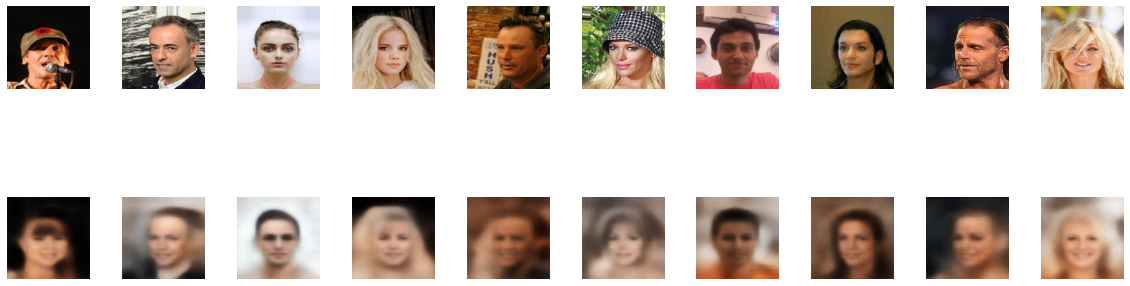

In [25]:
example_batch = next(data_flow_generic)
example_images = example_batch[0]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(20, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')        
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:1289: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


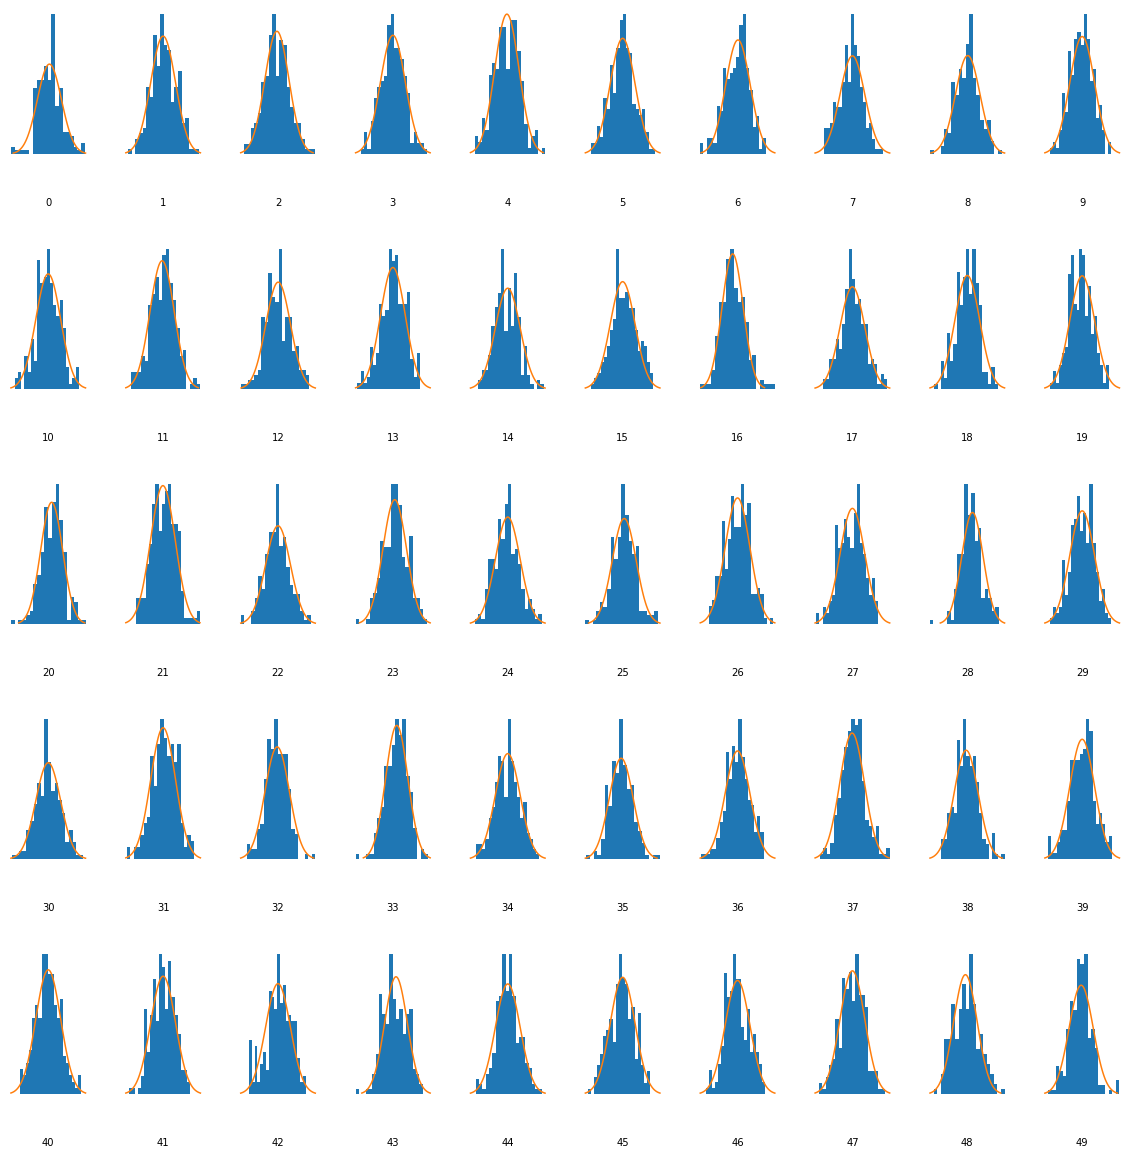

In [27]:
from scipy.stats import norm

z_test = vae.encoder.predict_generator(data_flow_generic, steps = 20, verbose = 1)

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(50):
    ax = fig.add_subplot(5, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

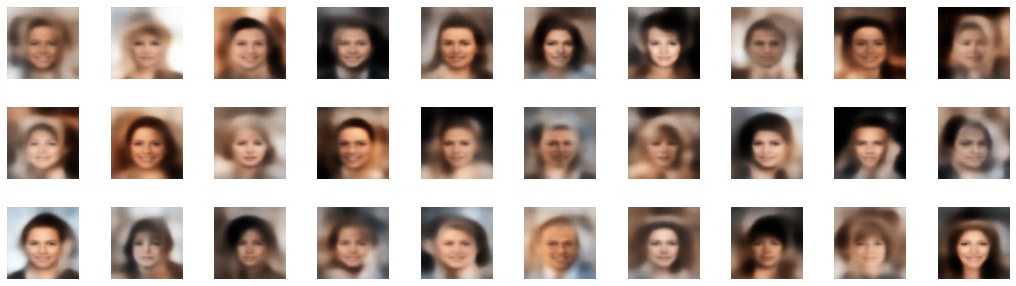

In [29]:
## Generate new faces

n_to_show = 30

znew = np.random.normal(size=(n_to_show, vae.z_dim))

reconst = vae.decoder.predict(np.array(znew))

fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=.4, wspace=.4)

for i in range(n_to_show):
  ax = fig.add_subplot(3, 10, i+1)
  ax.imshow(reconst[i,:,:,:])
  ax.axis('off')

plt.show()

In [30]:
def get_vector_from_label(label, batch_size):

    data_flow_label = imageLoader.build(att, batch_size, label = label)

    origin = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_sum_POS = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_n_POS = 0
    current_mean_POS = np.zeros(shape = vae.z_dim, dtype = 'float32')

    current_sum_NEG = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_n_NEG = 0
    current_mean_NEG = np.zeros(shape = vae.z_dim, dtype = 'float32')

    current_vector = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_dist = 0

    print('label: ' + label)
    print('images : POS move : NEG move :distance : 𝛥 distance')
    while(current_n_POS < 10000):

        batch = next(data_flow_label)
        im = batch[0]
        attribute = batch[1]

        z = vae.encoder.predict(np.array(im))

        z_POS = z[attribute==1]
        z_NEG = z[attribute==-1]

        if len(z_POS) > 0:
            current_sum_POS = current_sum_POS + np.sum(z_POS, axis = 0)
            current_n_POS += len(z_POS)
            new_mean_POS = current_sum_POS / current_n_POS
            movement_POS = np.linalg.norm(new_mean_POS-current_mean_POS)

        if len(z_NEG) > 0: 
            current_sum_NEG = current_sum_NEG + np.sum(z_NEG, axis = 0)
            current_n_NEG += len(z_NEG)
            new_mean_NEG = current_sum_NEG / current_n_NEG
            movement_NEG = np.linalg.norm(new_mean_NEG-current_mean_NEG)

        current_vector = new_mean_POS-new_mean_NEG
        new_dist = np.linalg.norm(current_vector)
        dist_change = new_dist - current_dist


        print(str(current_n_POS)
              + '    : ' + str(np.round(movement_POS,3))
              + '    : ' + str(np.round(movement_NEG,3))
              + '    : ' + str(np.round(new_dist,3))
              + '    : ' + str(np.round(dist_change,3))
             )

        current_mean_POS = np.copy(new_mean_POS)
        current_mean_NEG = np.copy(new_mean_NEG)
        current_dist = np.copy(new_dist)

        if np.sum([movement_POS, movement_NEG]) < 0.08:
            current_vector = current_vector / current_dist
            print('Found the ' + label + ' vector')
            break

    return current_vector

In [31]:
def add_vector_to_images(feature_vec):

    n_to_show = 5
    factors = [-4,-3,-2,-1,0,1,2,3,4]

    example_batch = next(data_flow_generic)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    z_points = vae.encoder.predict(example_images)

    fig = plt.figure(figsize=(18, 10))

    counter = 1

    for i in range(n_to_show):

        img = example_images[i].squeeze()
        sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
        sub.axis('off')        
        sub.imshow(img)

        counter += 1

        for factor in factors:

            changed_z_point = z_points[i] + feature_vec * factor
            changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

            img = changed_image.squeeze()
            sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
            sub.axis('off')
            sub.imshow(img)

            counter += 1

    plt.show()

In [33]:
BATCH_SIZE = 500
smiling_vec = get_vector_from_label('Smiling', BATCH_SIZE)

Found 202599 validated image filenames.
label: Smiling
images : POS move : NEG move :distance : 𝛥 distance
243    : 1.262    : 1.103    : 1.768    : 1.768
495    : 0.656    : 0.66    : 1.558    : -0.209
750    : 0.408    : 0.386    : 1.435    : -0.123
1004    : 0.262    : 0.259    : 1.379    : -0.056
1269    : 0.203    : 0.183    : 1.331    : -0.048
1500    : 0.152    : 0.163    : 1.307    : -0.024
1741    : 0.134    : 0.147    : 1.282    : -0.025
1994    : 0.113    : 0.126    : 1.264    : -0.019
2240    : 0.11    : 0.097    : 1.238    : -0.026
2484    : 0.099    : 0.095    : 1.235    : -0.003
2728    : 0.076    : 0.087    : 1.226    : -0.009
2970    : 0.082    : 0.079    : 1.212    : -0.013
3207    : 0.069    : 0.079    : 1.204    : -0.009
3454    : 0.065    : 0.061    : 1.197    : -0.007
3689    : 0.054    : 0.058    : 1.181    : -0.015
3948    : 0.064    : 0.053    : 1.18    : -0.001
4208    : 0.055    : 0.053    : 1.173    : -0.008
4445    : 0.046    : 0.051    : 1.171    : -0.002


Smiling Vector


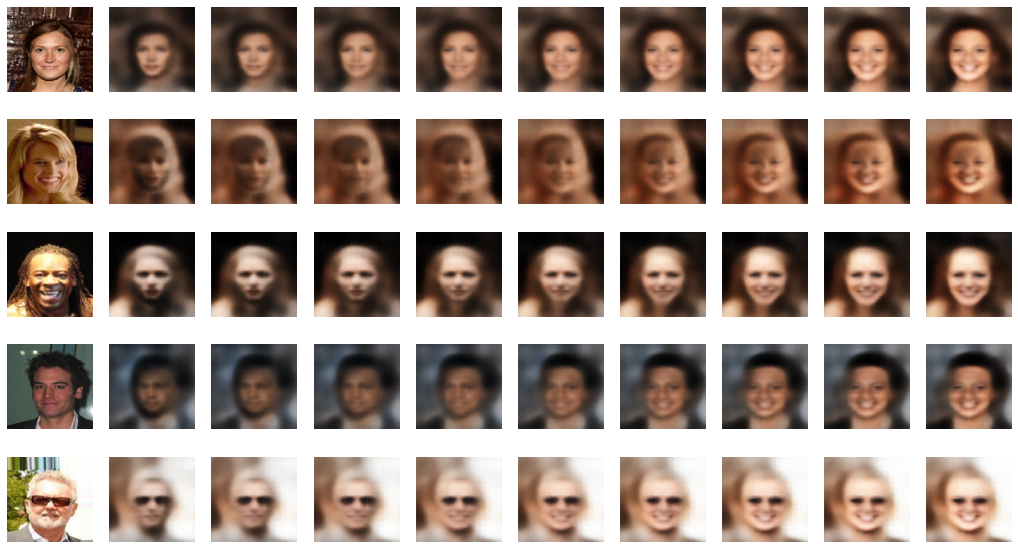

In [34]:
print('Smiling Vector')
add_vector_to_images(smiling_vec)